In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('/Users/Oller/Downloads/Datern.mplstyle')

import numpy as np
import pandas as pd

#Gradient colours
from matplotlib.colors import LinearSegmentedColormap
nodes = [0, 0.5,1.0]
color = ['#00ACF0','#ffffff','#A834FF']
cmap = LinearSegmentedColormap.from_list("", list(zip(nodes, color)))

%config InlineBackend.figure_format='retina'

In [28]:
df = pd.read_csv("/Users/Oller/Downloads/Kaggle_Training_Data_set

SyntaxError: EOL while scanning string literal (<ipython-input-28-1e330e19b710>, line 1)

In [10]:
df.head()
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15966 entries, 0 to 15965
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               15966 non-null  int64  
 1   Name             15964 non-null  object 
 2   Platform         15966 non-null  object 
 3   Year_of_Release  15720 non-null  float64
 4   Genre            15964 non-null  object 
 5   Publisher        15918 non-null  object 
 6   EU_Sales         15966 non-null  float64
 7   Global_Sales     15966 non-null  float64
 8   Critic_Score     7771 non-null   float64
 9   Critic_Count     7771 non-null   float64
 10  User_Score       9545 non-null   object 
 11  User_Count       7161 non-null   float64
 12  Developer        9608 non-null   object 
 13  Rating           9496 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 1.7+ MB


In [11]:
new_df=df.dropna()

In [12]:
new_df.head()
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6492 entries, 246 to 15842
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               6492 non-null   int64  
 1   Name             6492 non-null   object 
 2   Platform         6492 non-null   object 
 3   Year_of_Release  6492 non-null   float64
 4   Genre            6492 non-null   object 
 5   Publisher        6492 non-null   object 
 6   EU_Sales         6492 non-null   float64
 7   Global_Sales     6492 non-null   float64
 8   Critic_Score     6492 non-null   float64
 9   Critic_Count     6492 non-null   float64
 10  User_Score       6492 non-null   object 
 11  User_Count       6492 non-null   float64
 12  Developer        6492 non-null   object 
 13  Rating           6492 non-null   object 
dtypes: float64(6), int64(1), object(7)
memory usage: 760.8+ KB


In [38]:
#new_df.head(10)
#eu sales, critic score, user_score
print(new_df['Global_Sales'])

246      0.18
249      0.17
252      0.17
253      0.17
255      0.17
         ... 
15172    0.14
15496    1.27
15702    0.03
15792    0.03
15842    0.03
Name: Global_Sales, Length: 6492, dtype: float64


TypeError: unsupported operand type(s) for /: 'str' and 'int'

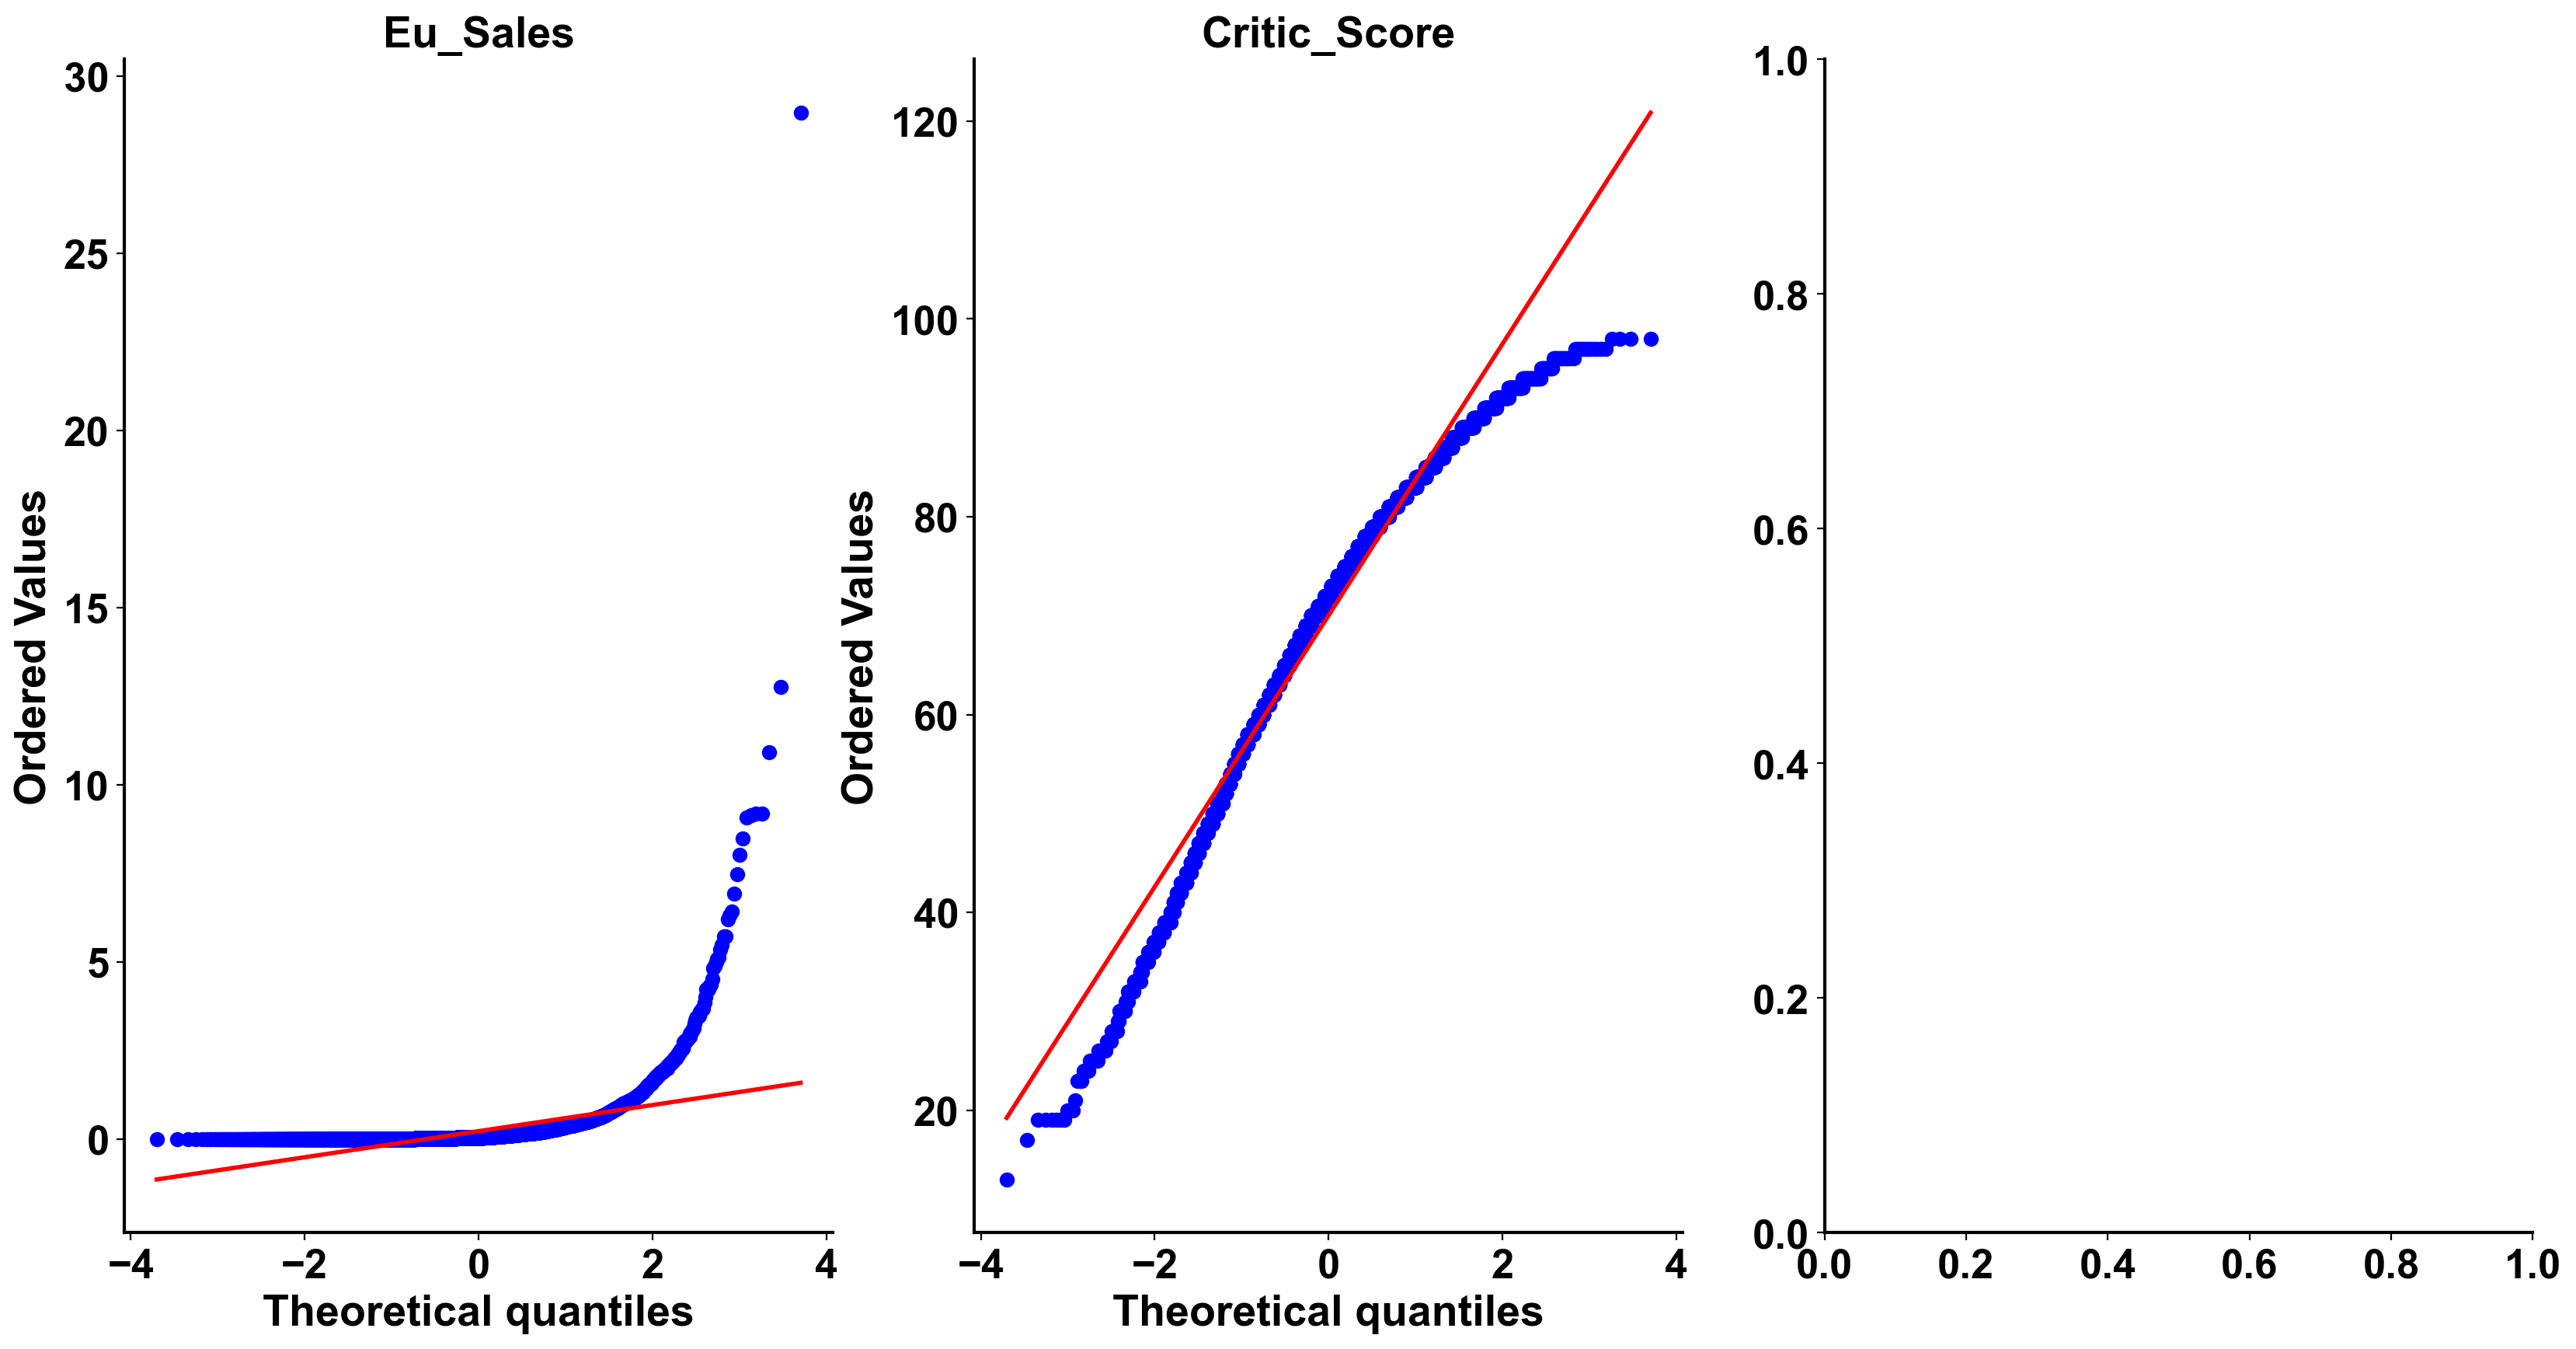

In [18]:
from scipy.stats import probplot

numerical = ['EU_Sales', 'Critic_Score', 'User_Score']

_, ax = plt.subplots(1, 3)

for i,var in enumerate(numerical):
    probplot(new_df[var], dist="norm", plot=ax[i])
    ax[i].set_title(var.title())

In [25]:
#separating into response matrix (x) and vector of targets(y)
X = new_df.iloc[:, 6:12:2]
#print(X.head())

Y = new_df.iloc[:,7]
print(Y.tail())



15172    0.14
15496    1.27
15702    0.03
15792    0.03
15842    0.03
Name: Global_Sales, dtype: float64


In [27]:
from sklearn.linear_model import LinearRegression
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X, Y)

LinearRegression()

In [29]:
X_test = pd.read_csv("/Users/Oller/Downloads/Kaggle_Datern_Test_Set.csv")

In [32]:
X_test_mod = X_test.iloc[:, 6:12:2]
X_test_mod = X_test_mod.dropna()

In [34]:
y_pred = regr.predict(X_test_mod)
y_pred

array([-9.98193303e-02, -9.20638068e-02,  6.60105903e-02,  6.74644651e+00,
       -1.18870126e-01,  1.96991368e+00,  2.90242938e-02,  2.37834626e+01,
        1.55467054e+02,  2.91946424e+01,  2.26502009e+01,  5.12231773e+01,
        9.67903297e+00,  7.86571317e+00,  1.68198633e+01,  1.11875913e+01,
        1.45853455e+01,  3.06791151e+01,  4.03443845e+00,  2.70166549e+01,
        2.05093552e+00,  1.09302916e+02,  4.19999158e+01,  1.84366575e+01,
        6.98605679e-01,  5.39752143e+00,  1.47013703e+01,  1.41423798e+01,
        1.47094020e+01,  7.74418767e+00,  1.84352555e+00,  6.45863754e+00,
        4.48486291e+00,  2.21048400e+00,  2.64709176e+01,  4.78247333e+00,
        1.54153055e+01,  2.77379125e+00,  3.11873155e+00,  3.03500772e+00,
        1.70416178e+00,  1.27660882e+01,  6.32594614e+00,  2.68081863e+00,
        5.72200999e+00,  3.55768723e+01,  8.58075744e+01,  2.72168296e+00,
        2.03887321e+00,  1.07393578e+01,  4.75891192e+00,  1.87412755e+00,
        8.58295385e-01,  

In [48]:
#create new results dataframe
results_df = pd.DataFrame(y_pred)

In [61]:
print(results_df.head())
print(results_df.info())

          0  ID
0 -0.099819 NaN
1 -0.092064 NaN
2  0.066011 NaN
3  6.746447 NaN
4 -0.118870 NaN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 357 entries, 0 to 356
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       357 non-null    float64
 1   ID      169 non-null    float64
dtypes: float64(2)
memory usage: 5.7 KB
None


In [54]:
#get new column with the ID of each game 
game_ID = X_test.dropna()
game_ID = game_ID['ID']
print(game_ID)

27       95
29      172
30      246
31      290
32      326
       ... 
743    7812
745    7876
748    8059
749    8093
751    8145
Name: ID, Length: 333, dtype: int64


In [56]:
#add this column to the results 
results_df['ID'] = game_ID

In [60]:
print(results_df)

             0       ID
0    -0.099819      NaN
1    -0.092064      NaN
2     0.066011      NaN
3     6.746447      NaN
4    -0.118870      NaN
..         ...      ...
352   0.603566      NaN
353  20.507660  14342.0
354   1.095071      NaN
355   0.480422      NaN
356   1.821252      NaN

[357 rows x 2 columns]
